In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plot style
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

print("Libraries loaded successfully!")

Libraries loaded successfully!


In [2]:
# Load the processed data for Delhi (or any city you want to analyze)
# Note: We use '../' to go up one folder level from 'notebooks' to 'data'
city = 'Delhi'
file_path = f'../data/processed/{city}.csv'

if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    print(f"Loaded {len(df)} days of data for {city}.")
    print(df.head())
else:
    print(f"Error: File not found at {file_path}")

Loaded 2009 days of data for Delhi.
              AQI
Date             
2015-01-01  472.0
2015-01-02  454.0
2015-01-03  143.0
2015-01-04  319.0
2015-01-05  325.0


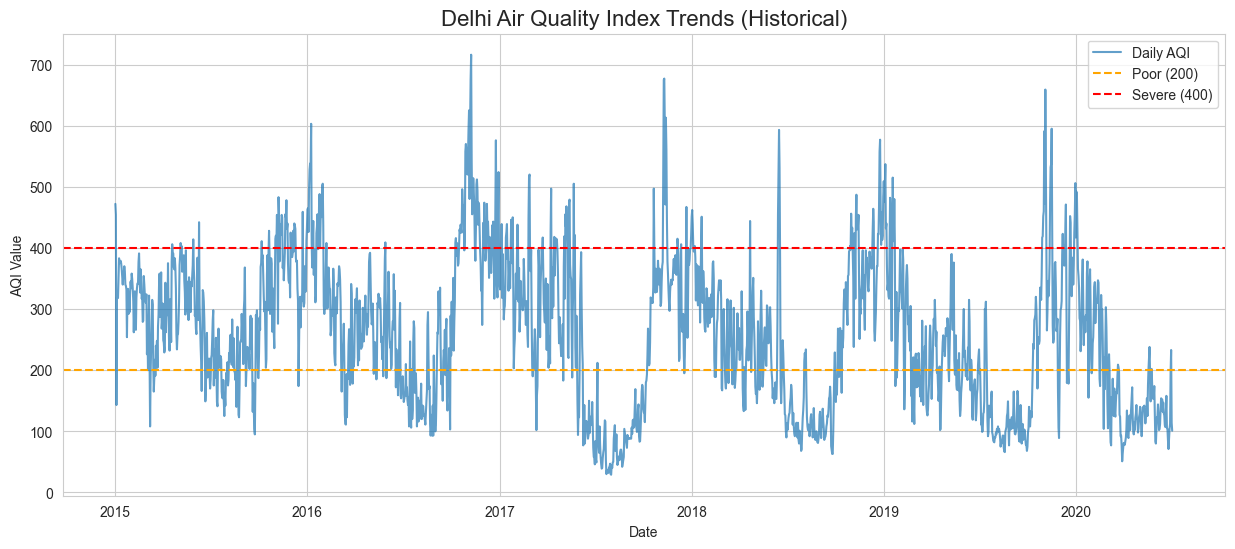

In [3]:
# Plot the entire history
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['AQI'], label='Daily AQI', color='tab:blue', alpha=0.7)

# Add danger lines
plt.axhline(y=200, color='orange', linestyle='--', label='Poor (200)')
plt.axhline(y=400, color='red', linestyle='--', label='Severe (400)')

plt.title(f'{city} Air Quality Index Trends (Historical)', fontsize=16)
plt.ylabel('AQI Value')
plt.xlabel('Date')
plt.legend()
plt.show()

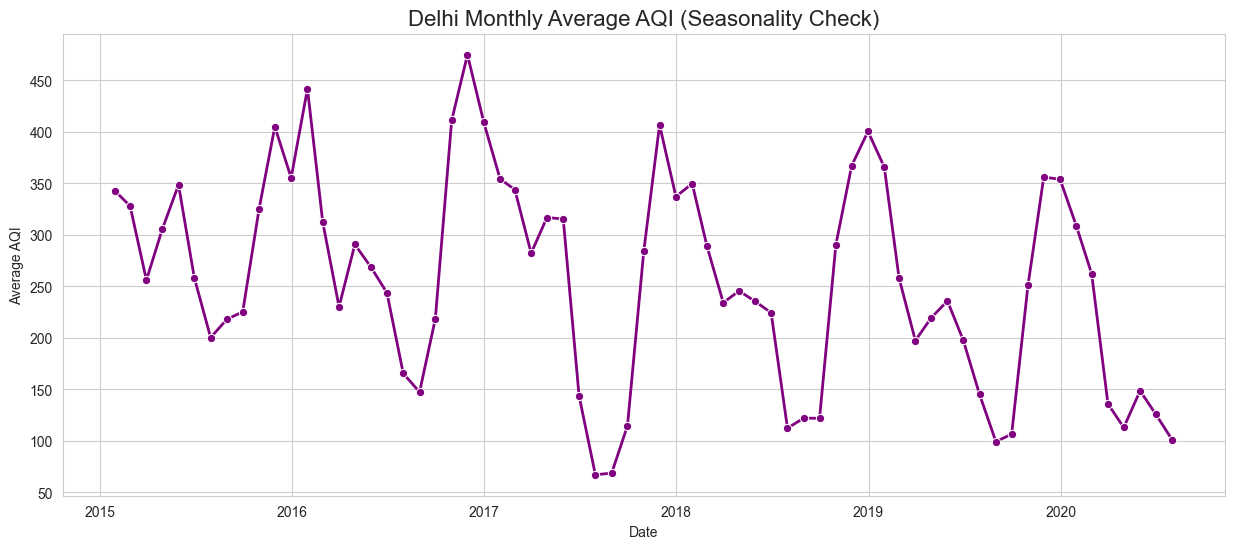

In [5]:
# Resample to monthly averages to see the clear "Winter Spike" pattern
df_monthly = df.resample('ME').mean()

plt.figure(figsize=(15, 6))
sns.lineplot(x=df_monthly.index, y=df_monthly['AQI'], color='purple', marker='o', linewidth=2)

plt.title(f'{city} Monthly Average AQI (Seasonality Check)', fontsize=16)
plt.ylabel('Average AQI')
plt.xlabel('Date')
plt.grid(True)
plt.show()